In [10]:
import seaborn as sns
import pandas as pd
import os
from sklearn.metrics import *
import matplotlib.pyplot as plt
import scanpy as sc


In [11]:
import palettable

method_order = [
    'Louvain','Leiden',
    'SpaGCN_without',
    'SpaGCN_with','BayesSpace', 'stLearn',
    'SEDR',
    'CCST','SCAN-IT','STAGATE','SpaceFlow','conST_nopre','BASS','DeepST'
]

cmp = palettable.tableau.Tableau_20.mpl_colors
method_color_dict = dict(zip(method_order,cmp))

In [12]:
pd_dict = {
    'replicate':[],
    'resolution':[],
    'ARI':[],
    'NMI':[],
    'algor_name':[]
}

In [13]:
method_order2 = [
    'Louvain','Leiden',
    'SpaGCN_without',
    # 'SpaGCN_with','BayesSpace', 'stLearn',
    'SEDR',
    'CCST','SCAN-IT','STAGATE','SpaceFlow','conST_nopre','BASS','DeepST'
]

In [14]:
for j in range(11):
    print(method_order2[j])
    path = f'/home/workspace2/zhaofangyuan/domain_output/osmfish_res/{method_order2[j]}'
    for file in os.listdir(path):
        file_whole = f'{path}/{file}'
        adata = sc.read_h5ad(file_whole)

        res = int(file[:-5].split('_')[-1])
        for i in range(5):
            obs_df = adata.obs.dropna()
            pred_label = obs_df[f'pred_{i+1}']
            true_label = obs_df['Region']

            # pred_label = adata.obs[f'pred_{i+1}']
            # true_label = adata.obs['Region']
            nmi = normalized_mutual_info_score(pred_label,true_label)
            ari = adjusted_rand_score(pred_label,true_label)
            
            pd_dict['replicate'].append(i)
            pd_dict['resolution'].append(res)        
            pd_dict['ARI'].append(ari)
            pd_dict['NMI'].append(nmi)
            pd_dict['algor_name'].append(method_order2[j])
        


Louvain
Leiden
SpaGCN_without
SEDR
CCST
SCAN-IT
STAGATE
SpaceFlow
conST_nopre
BASS
DeepST


In [15]:
pd_df = pd.DataFrame(pd_dict)

In [16]:
pd_df

,replicate,resolution,ARI,NMI,algor_name
0,0,600,0.341919,0.393709,Louvain
1,1,600,0.341919,0.393709,Louvain
2,2,600,0.341919,0.393709,Louvain
3,3,600,0.341919,0.393709,Louvain
4,4,600,0.341919,0.393709,Louvain
...,...,...,...,...,...
530,0,850,0.448787,0.581318,DeepST
531,1,850,0.448787,0.581318,DeepST
532,2,850,0.448787,0.581318,DeepST
533,3,850,0.448787,0.581318,DeepST


In [17]:
pd_df.sort_values(by="resolution" , inplace=True, ascending=True) 
pd_df

,replicate,resolution,ARI,NMI,algor_name
356,1,500,0.378551,0.611648,SpaceFlow
113,3,500,0.175697,0.288935,SpaGCN_without
357,2,500,0.413250,0.619415,SpaceFlow
358,3,500,0.391416,0.617677,SpaceFlow
359,4,500,0.394873,0.633978,SpaceFlow
...,...,...,...,...,...
319,4,950,0.362964,0.552289,STAGATE
250,0,950,0.364354,0.585712,SCAN-IT
414,4,950,0.128570,0.245436,conST_nopre
131,1,950,0.376943,0.518613,SpaGCN_without


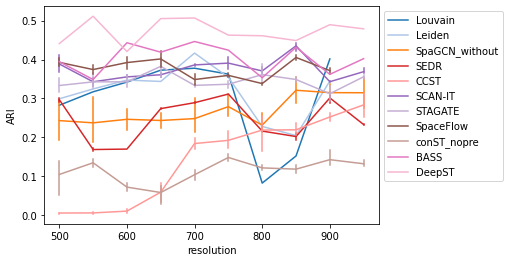

In [18]:
sns.lineplot(
    data=pd_df,
    x='resolution',
    y='ARI',
    hue="algor_name",

    palette=method_color_dict,
    hue_order=method_order,

    legend = False,
    err_style='bars')


# plt.legend(labels = ['Day1','Day2'],loc = 2, bbox_to_anchor = (1,1))
plt.legend(labels = ['Louvain','Leiden','SpaGCN_without',
    # 'SpaGCN_with','BayesSpace', 'stLearn',
    'SEDR','CCST','SCAN-IT','STAGATE','SpaceFlow','conST_nopre','BASS','DeepST'], bbox_to_anchor = (1,1))
plt.savefig('../all_res&spa/resolution_ari_all(lineplot).pdf',dpi=400,bbox_inches='tight',transparent=True)


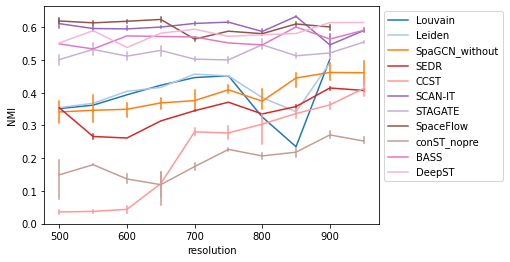

In [19]:
sns.lineplot(
    data=pd_df,
    x='resolution',
    y='NMI',
    hue="algor_name",
    palette=method_color_dict,
    hue_order=method_order,
    legend = False,
    err_style='bars')
# plt.legend(labels = ['Day1','Day2'],loc = 2, bbox_to_anchor = (1,1))
plt.legend(labels = ['Louvain','Leiden','SpaGCN_without',
    # 'SpaGCN_with','BayesSpace', 'stLearn',
    'SEDR','CCST','SCAN-IT','STAGATE','SpaceFlow','conST_nopre','BASS','DeepST'], bbox_to_anchor = (1,1))
plt.savefig('../all_res&spa/resolution_nmi_all(lineplot).pdf',dpi=400,bbox_inches='tight',transparent=True)
